# 05 - Insights and Recommendations

- Now that we've finished our Exploratory Data Analysis and trained our models, we shall report our findings here. We shall first focus on insights gained from EDA.
- For EDA, we first bring back our correlation heatmap to check for any relationships regarding our numeric predictors. We can also compare the relationships between them and our target numeric variable: MonthlyIncome.

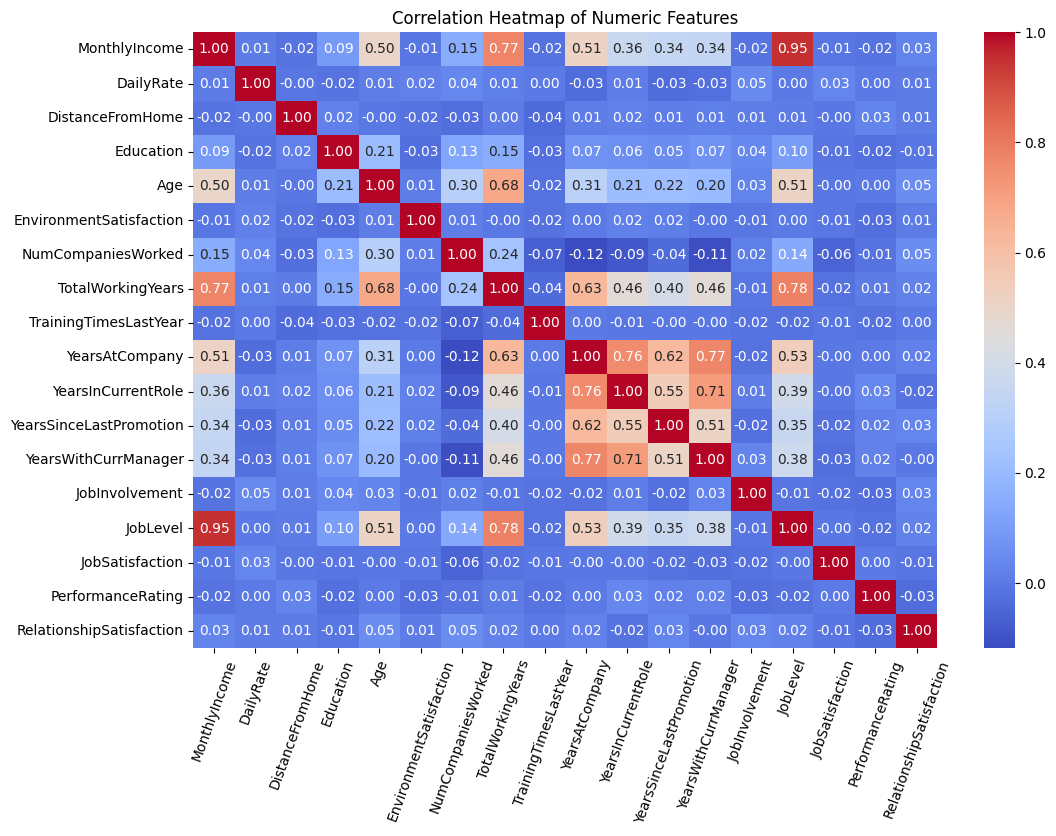

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("hr_data_cleaned.csv")

# Define the numeric columns of interest
numeric_cols = ["MonthlyIncome", "DailyRate", "DistanceFromHome", "Education", 
                "Age", "EnvironmentSatisfaction", "NumCompaniesWorked", "TotalWorkingYears",
                "TrainingTimesLastYear", "YearsAtCompany","YearsInCurrentRole",
                "YearsSinceLastPromotion", "YearsWithCurrManager", "JobInvolvement",
                "JobLevel", "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction"]

plt.figure(figsize=(12, 8)) 
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.xticks(rotation=70)
plt.show()


## Insights

- Based on this results, we can see that those who stay longer at the same company can expect higher income, as evidenced by the **strong positive** correlation between `MonthlyIncome` and both `TotalWorkingYears` and `JobLevel`, and **weak positive** correlations with `Age`, `TotalWorkingYears`,`YearsAtCompany`,`YearsInCurrentRole`,`YearsSinceLastPromotion` and `YearsWithCurrManager`. This is of course a given, as we can expect promotions, etc.

- For potential job seekers, we do recommend finding a job with an environment they can easily adapt to and that they are satisfied in. In fact we can test these since they are part of the dataset.

- But surprisingly, 'JobSatisfaction', 'PeformanceRating' and 'RelationshipSatisfaction' seem to have no effect on MonthlyIncome. However, we still recommend finding a job that suits a person's interest. We can test this further with other variables like `EducationField` which is a categorical variable.

- There do not seem to be any factors that cause a decrease in MonthlyIncome.

#### Moving on to categorical variables:

We can compare boxplots, one for each categorical variable, to compare and derive our insights. 

C:\Users\darre\AppData\Local\Temp\ipykernel_39744\2285265959.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\darre\AppData\Local\Temp\ipykernel_39744\2285265959.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\darre\AppData\Local\Temp\ipykernel_39744\2285265959.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\darre\AppData\Local\Temp\ipykernel_39744\2285265959.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

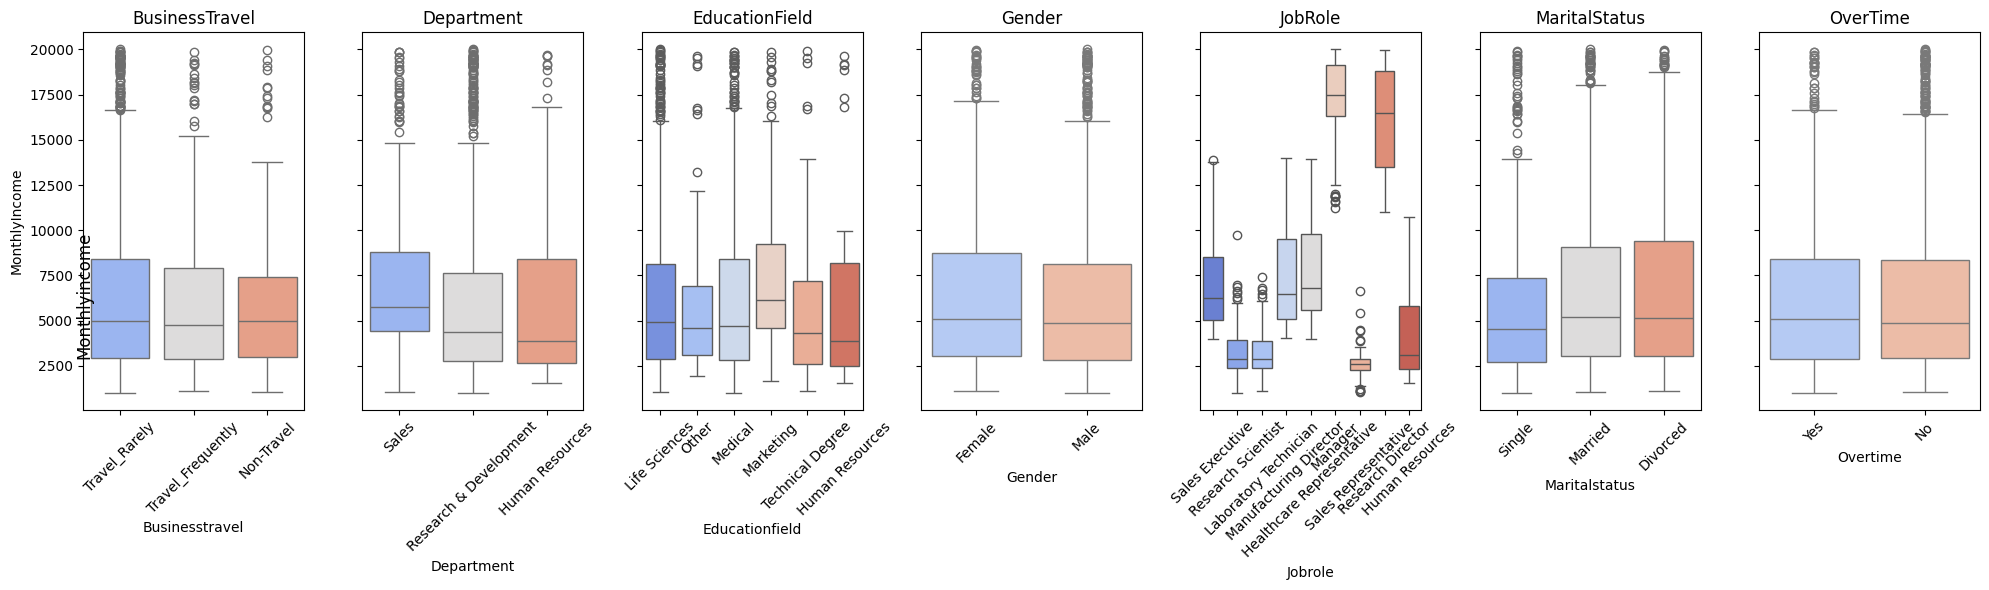

In [18]:
# List of categorical variables
categorical_vars = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime"]

# Target variable (e.g., gross monthly median salary)
target_var = "MonthlyIncome"

# Create subplots
fig, axes = plt.subplots(1, len(categorical_vars), figsize=(20, 6), sharey=True)

# Generate a boxplot for each categorical variable
for idx, cat_var in enumerate(categorical_vars):
    sns.boxplot(
        x=cat_var,
        y=target_var,
        data=df,
        ax=axes[idx],
        palette="coolwarm"
    )
    axes[idx].set_title(cat_var, fontsize=12)
    axes[idx].set_xlabel(cat_var.capitalize(), fontsize=10)
    axes[idx].tick_params(axis='x', rotation=45)

# Add a single shared y-label
fig.text(0.04, 0.5, f"{target_var.replace('_', ' ').capitalize()}", va='center', rotation='vertical', fontsize=12)
plt.tight_layout()
plt.show()

## Insights

- We can see that people working in the `Sales` department tend to have slightly higher salaries, compared to those from `HR` and `R&D`. 

- Meanwhile, those who graduated with a background in `Marketing` also tend to have higher salaries.

Of course, we cannot simply recommend people jobs that they are not suitable for them just because a specific kind tends to pay higher. However, we can make recommendations for students who are still unsure of their career path, or those looking to seek alternative job paths.

## Recommendations to those seeking higher paying jobs

- Consider paths that lead to job roles involving being `Healthcare Representatives` or `Research Director`. These job roles pay **significantly** higher compared to the rest, although working hard to achieve such roles is another issue altogether. 

Now going back to the heatmap for numeric predictors, we notice another interesting point.

## Insights gained with regards to the heatmap

- We are trying to find variables with high correlations to the response variable, but we notice that there is also high correlation going on within the predictor variables themselves.

- This is called **multicollinearity**.

- If predictors are strongly correlated, it becomes hard to determine which variable is actually influencing the target variable, undermining the purpose of regression analysis.

- In our case, we should have only left 1 of the variables in the model for prediction. However, the are also other methods to deal with multi collinearity, including the use of `Ridge or Lasso regression` techniques or the use of `Pricincipal Component Analysis(PCA)`.


In [36]:
# Retrying with Ridge Regression and Lasso Regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Target variable
target = "MonthlyIncome"

# Features
categorical_features = ["BusinessTravel", "Department", "EducationField", "Gender","OverTime", "JobRole", "MaritalStatus"]
numerical_features = ["JobLevel","Age", "DistanceFromHome", "Education", "NumCompaniesWorked", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]

# Drop rows where target is missing
df = df.dropna(subset=[target])

# Define preprocessing (One-Hot Encoding)
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

full_transformer = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),  # Scale numerical features
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Define Ridge Regression model pipeline
ridge_pipeline = Pipeline([
    ("preprocessor", full_transformer),
    ("model", Ridge(alpha=1.0))  # Specify regularization strength with alpha
])

# Define Lasso Regression model pipeline
lasso_pipeline = Pipeline([
    ("preprocessor", full_transformer),
    ("model", Lasso(alpha=0.1))  # Specify regularization strength using alpha
])

# Train-test split
X = df[numerical_features + categorical_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Ridge Regression model
ridge_pipeline.fit(X_train, y_train)

# Train the Lasso Regression model
lasso_pipeline.fit(X_train, y_train)

# Predictions
y_pred = ridge_pipeline.predict(X_test)
y_pred_lasso = lasso_pipeline.predict(X_test)

# Evaluate model and print metrics
print(f"Ridge Regression - Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Ridge Regression - Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Ridge Regression - R² Score: {r2_score(y_test, y_pred):.2f}")

# Evaluate Lasso Regression model and print metrics
print(f"Lasso Regression - Mean Squared Error: {mean_squared_error(y_test, y_pred_lasso):.2f}")
print(f"Lasso Regression - Mean Absolute Error: {mean_absolute_error(y_test, y_pred_lasso):.2f}")
print(f"Lasso Regression - R² Score: {r2_score(y_test, y_pred_lasso):.2f}")

Ridge Regression - Mean Squared Error: 1371874.48
Ridge Regression - Mean Absolute Error: 886.67
Ridge Regression - R² Score: 0.94
Lasso Regression - Mean Squared Error: 1366899.78
Lasso Regression - Mean Absolute Error: 886.41
Lasso Regression - R² Score: 0.94


C:\Users\darre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.977e+06, tolerance: 2.605e+06
  model = cd_fast.enet_coordinate_descent(


Franky, we did not notice much of a change in model results, but it was worth a try.

## Insights: When a scaler is necessary

- We also notice cases where a **StandardScaler** or **MinMaxScaler** is necessary in our pipeline for certain models, while others do not need them. Upon further research, we notice only non tree based models like LinearRegression (including Ridge/Lasso) do not require it.

- This is due to many of these models which are sensitive to the magnitude of numerical feature values, unlike tree-based models which are invariant to scaling.

## Insight: Worse performance from tree based models

- Tree based models seem to perform worse across the board, with **lower R² scores and higher MAE and MSE scores**.

- This is despite the use of a `OneHotEncoder` to deal with high cardinality categorical variables and model parameter tuning.

- This can be attributed to: Linear Relationships. For instance, the high correlation between `JobLevel` and `MonthlyIncome` improved the R² score of the model by 0.7 points when `JobLevel` was included with part of the numerical variables for training.

- Simple LR is also less 'distracted' if we remove multicollinear variables.

## Recommendation

Should use **Linear Regression** to predict `MonthlyIncome` since majority of such datasets consist of variables with higher linear relationships.

- Now we move on the model insights and recommendations for attrition prediction.

## Recommendation: Use of a StackingClassifier

- In the case of `attiriton` prediction, stacking multiple models together can combine the strengths and compensate for the weakness of several models.

- We used `DecisionTress`, `Logistic Regression` and `SVM` for stacking.


## Insight: It's not always good though

- Take for instance, the **Stacking Regressor** that we used for predicting `MonthlyIncome`, it turns out that `LR` left on its own performed the best.

Moving on to the results for attrition:

- Not much insights from EDA: It only tells us matters like a higher attrition rate for workers with low `YearsAtCompany`, which is not an insight on it's own. It only makes sense, since obviously, those who stayed longer at the company are still working.

- Worried that such factors can **overfit** the model, disallowing us to find other factors that affect attrition.



